In [3]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
ggndf=pd.read_csv('gurgaon_10k.csv')
koldf=pd.read_csv('kolkata.csv')
mumdf=pd.read_csv('mumbai.csv')
hyddf=pd.read_csv('hyderabad.csv')

/var/folders/4c/bxwj5rds7m37_c23zm69g2q40000gn/T/ipykernel_46027/4160088328.py:1: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  ggndf=pd.read_csv('gurgaon_10k.csv')


In [4]:
ggndf.head()
print(ggndf.shape)

(10704, 67)


In [5]:
# Array of parameters to drop
parameters_to_drop = ['PROP_ID', 'PHOTO_URL', 'MEDIUM_PHOTO_URL','DESCRIPTION','CITY','metadata','BUILDING_ID','MAP_DETAILS','FSL_Data','FORMATTED','FEATURES','AMENITIES','PD_URL','EXPIRY_DATE','PROP_HEADING','PROP_DETAILS_URL','CLASS_HEADING','CLASS_LABEL','SECONDARY_TAGS','PROPERTY_IMAGES','THUMBNAIL_IMAGES','FORMATTED_LANDMARK_DETAILS','CONTACT_NAME','DEALER_PHOTO_URL','BUILDING_NAME','CITY_ID','profile','xid','metadata','location','BUILTUP_SQFT','SUPER_SQFT','COMMON_FURNISHING_ATTRIBUTES','QUALITY_SCORE','FURNISHING_ATTRIBUTES']

# Drop the parameters from the DataFrame ggndf
ggndf.drop(parameters_to_drop, axis=1, inplace=True)


In [6]:
ggndf.shape

(10704, 33)

In [12]:
ggndf.head()

,PREFERENCE,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,REGISTER_DATE,PROP_NAME,MIN_PRICE,MAX_PRICE,PRICE_SQFT,LISTING,CARPET_SQFT,SUPERBUILTUP_SQFT,BROKERAGE,MIN_AREA_SQFT,MAX_AREA_SQFT,TOP_USPS,GROUP_NAME,AREA,PRICE,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,SOCIETY_NAME,LOCALITY_WO_CITY
0,S,Residential Apartment,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,8766.0,4,1,2,14,26.0,"29th Sep, 2023",Alpha Corp GurgaonOne 84,26300000,26300000,8766.0,R,3000.0,3434.0,263000.0,319.028902,319.028902,"['North Facing', 'Recently Renovated', 'Gated ...",SPID_GROUP_SEARCH_NORMAL,3434 sq.ft.,2.63 Cr,10.0,propertyline,Alpha Corp GurgaonOne 84,Sector 84
1,S,Residential Apartment,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,21176.0,4,1,1,7,29.0,"29th Sep, 2023",DLF The Ultima,36000000,36000000,21176.0,R,1700.0,2870.0,1.0,266.631610,266.631610,"['North Facing', ""st. xavier's within 500m"", '...",SPID_GROUP_SEARCH_NORMAL,2870 sq.ft.,3.6 Cr,9.0,MVD AND ASSOCIATES,DLF The Ultima,Sector 81
2,R,Residential Apartment,Sector 66 Gurgaon,NaN,0,3.0,3,2.0,43.0,1,4,1,7,17.0,"27th Sep, 2023",Emaar MGF The Palm Drive,85000,85000,43.0,R,1450.0,1950.0,42000.0,181.160850,181.160850,"['3 Baths', 'Full Power Backup', 'huda city ce...",SPID_GROUP_SEARCH_NORMAL,1950 sq.ft.,"85,000",14.0,1st Nest Realtors,Emaar MGF The Palm Drive,Sector 66
3,S,Residential Apartment,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,13740.0,4,0,1,14,28.0,"23rd Sep, 2023",Experion Windchants,38500000,38500000,13740.0,R,NaN,2802.0,1.0,260.314206,260.314206,"['Gated Society', 'Overlooking Park/Garden', '...",SPID_GROUP_SEARCH_NORMAL,2802 sq.ft.,3.85 Cr,8.0,GROW MORE,Experion Windchants,Sector 112
4,R,Residential Apartment,Sector 104 Gurgaon,NaN,0,3.0,4,4.0,17.0,4,6,1,12,27.0,"23rd Sep, 2023",ATS Triumph,40000,40000,17.0,R,NaN,2290.0,1.0,212.747870,212.747870,"['4 Baths', 'Full Power Backup', 'Gated Societ...",SPID_GROUP_SEARCH_NORMAL,2290 sq.ft.,"40,000",14.0,GROW MORE,ATS Triumph,Sector 104


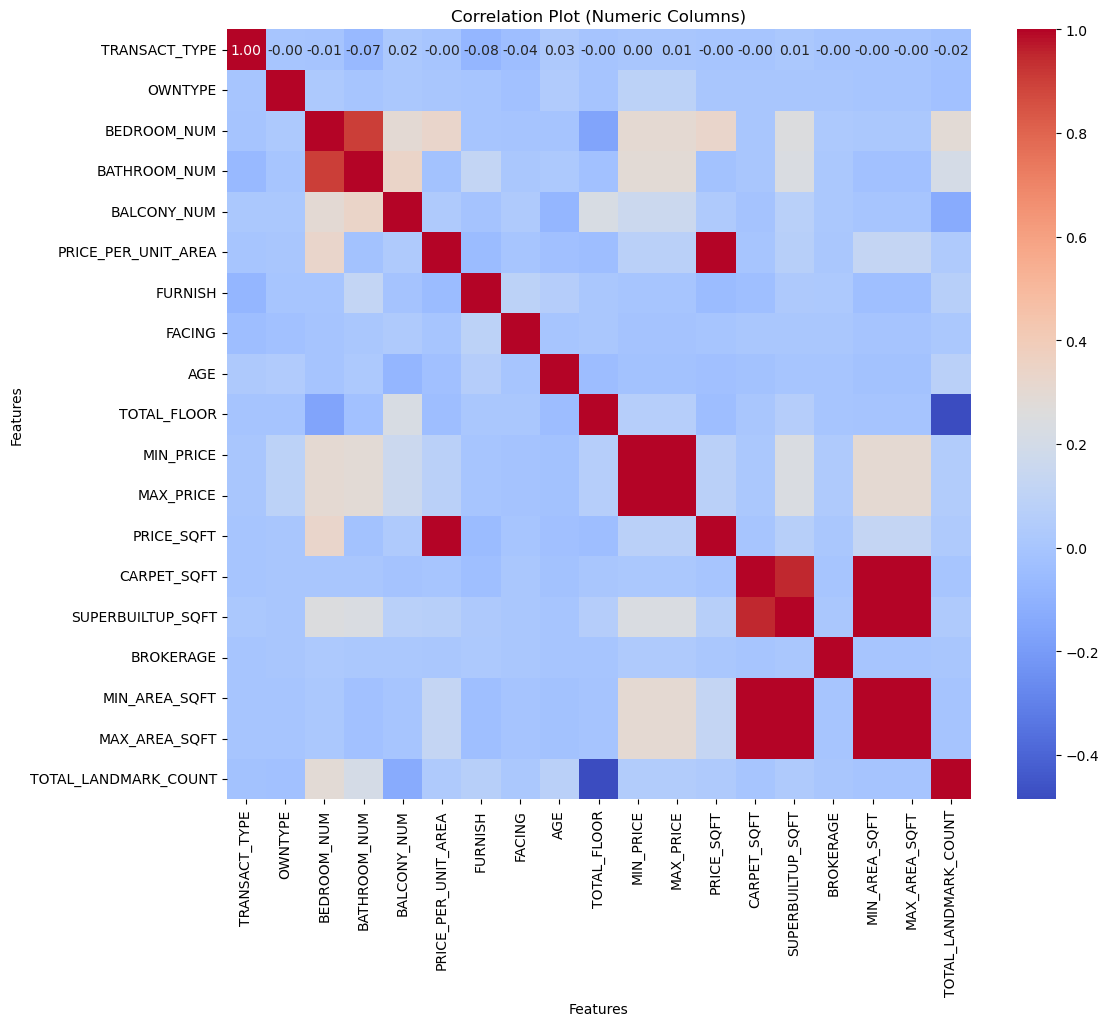

In [10]:
# Filter out columns of type int or float
numeric_columns = ggndf.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot (Numeric Columns)')
plt.xlabel('Features')
plt.ylabel('Features')
plt.savefig('correlation_plot_numeric.png')  # Save the plot
plt.show()


In [13]:
# Array of parameters to drop
parameters_to_drop = ['MIN_AREA_SQFT', 'MIN_PRICE']
# Drop the parameters from the DataFrame ggndf
ggndf.drop(parameters_to_drop, axis=1, inplace=True)

In [14]:
# Assuming you want to rename the column 'old_column_name' to 'new_column_name'
ggndf.rename(columns={'MAX_AREA_SQFT': 'AREA_SQFT'}, inplace=True)
ggndf.rename(columns={'MAX_PRICE': 'PRICE'}, inplace=True)



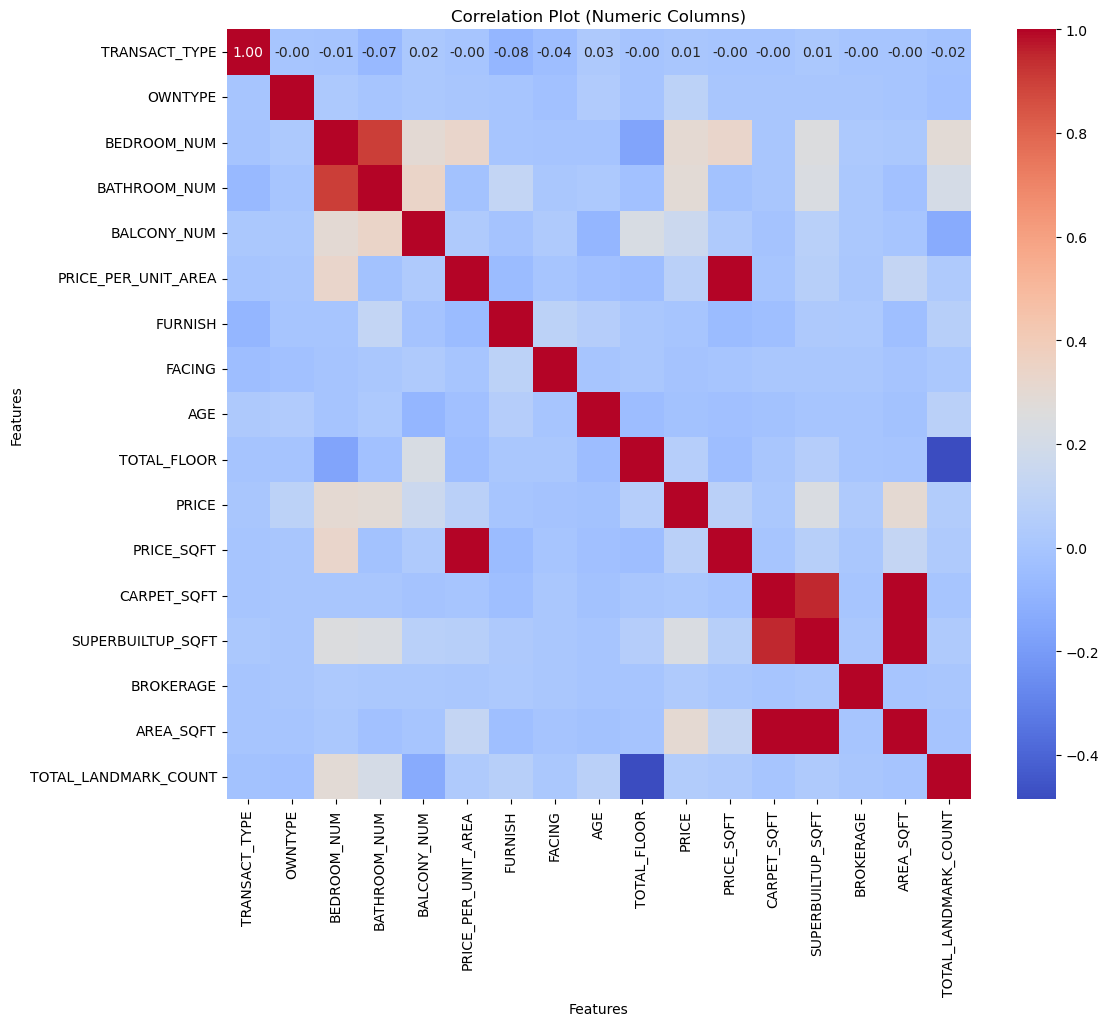

In [15]:
# Filter out columns of type int or float
numeric_columns = ggndf.select_dtypes(include=['int', 'float'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot (Numeric Columns)')
plt.xlabel('Features')
plt.ylabel('Features')
plt.savefig('correlation_plot_numeric.png')  # Save the plot
plt.show()
